# K-means聚类算法

### 无监督学习概述

无监督学习是机器学习的一个分支，其主要特点是使用未标记（unlabeled）的数据进行训练。与有监督学习不同，无监督学习的数据中没有预先定义的正确输出或标签。

模型在没有外部反馈（即没有标签来指导对错）的情况下，自行分析输入数据，寻找数据点之间的相似性、差异性或特定结构。

### Kmeans聚类算法概述

K-Means 算法是最常用且最简单的无监督聚类算法之一。它的目标是将数据集中 $n$ 个数据点划分到 $K$ 个簇中，使得每个点都属于离它最近的簇中心（均值）。

**目标**：将 $n$ 个数据点分成 $K$ 个簇，每个数据点都归属于离它最近的簇中心。

**输入**：

$\bullet$ 数据集 $X = \{x_1, x_2, \ldots, x_n\}$，其中 $x_i$ 是一个数据点。

$\bullet$ 簇的数量 $K$ (这是需要预先设定的参数)。

**输出**：

$\bullet$ $K$ 个簇的划分。

$\bullet$ 每个簇的中心点（质心）。

| 顺序 | 过程 |
|---|---|
| 1 | 随机抽取K个样本作为最初的质心 |
| 2 | 开始循环: |
| 2.1 | 将每个样本点分配到离他们最近的质心，生成K个簇 |
| 2.2 | 对于每个簇，计算所有被分到该簇的样本点的平均值作为新的质心 |
| 3 | 当质心的位置不再发生变化，迭代停止，聚类完成 |


##### 簇内平方和WCSS

是衡量聚类效果的重要指标，
$$\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2$$

$\cdot$ $K$ 是簇的数量。

$\cdot$ $C_i$ 代表第 $i$ 个簇。

$\cdot$ $x$ 是簇 $C_i$ 中的一个数据点。

$\cdot$ $\mu_i$ 是第 $i$ 个簇的中心（质心）。

$\cdot$ $\|x - \mu_i\|^2$ 表示数据点 $x$ 到簇中心 $\mu_i$ 的欧几里得距离的平方。

$\cdot$ 随着K的增加，可以变成0

在选择 K-Means 的最佳簇数量 $K$ 时，我们通常会使用**肘部法则 (Elbow Method)**。它就是通过绘制 WCSS 随 $K$ 值变化的曲线来寻找一个“肘部”：

$\cdot$ 随着 $K$ 值的增加，WCSS 的值会持续下降。

$\cdot$ 当 $K$ 增加到某个点时，WCSS 的下降幅度会显著减缓，形成一个类似“肘部”的拐点。

$\cdot$ 这个“肘部”通常被认为是选择最佳 $K$ 值的一个指示。



##### 算法复杂度

K-mean算法的的计算复杂度取决于：

$\cdot$ $n$：数据点的数量（样本数量）。

$\cdot$ $d$：数据点的维度特征。

$\cdot$ $K$：簇的数量。

$\cdot$ $I$：算法收敛所需要的迭代次数。

算法的计算主要分为两个阶段，这两个阶段在每次迭代中都会重复执行。

**单次迭代的复杂度**

$\bullet$ 分配数据点到最近的簇 (Assignment Step)

此步骤涉及计算每个数据点与所有 $K$ 个簇中心之间的距离，并将数据点分配给距离最近的簇。

对于数据集中的每一个数据点 ($x_j \in X, j=1, \ldots, n$)：

$\cdot$  需要计算它与**所有 $K$ 个当前簇中心**($\mu_1, \ldots, \mu_K$) 的距离。

$\cdot$  计算两个 $d$ 维向量之间的距离（例如欧几里得距离）需要 $O(d)$ 次基本操作。

$\cdot$  因此，这一步骤的计算复杂度为 $n \times K \times O(d) = \boldsymbol{O(n \cdot K \cdot d)}$。

$\bullet$ 更新簇中心 (Update Step)

此步骤涉及重新计算每个簇的中心，即该簇中所有数据点的均值。

对于**每一个簇**($C_i, i=1, \ldots, K$)：
$\cdot$ 重新计算其中心 $\mu_i$，即 $C_i$ 中所有数据点的平均值。

$\cdot$ 假设每个簇平均有 $n/K$ 个数据点。计算一个 $d$ 维向量的均值（对 $n/K$ 个点的 $d$ 个维度进行求和，再除以 $n/K$）大约需要 $O((n/K) \cdot d)$ 次操作。

$\cdot$ 因此，这一步骤的总计算复杂度为 $K \times O((n/K) \cdot d) = \boldsymbol{O(n \cdot d)}$。


总而言之，K-Means 算法在实践中通常被认为是高效的，因为它具有**线性的时间复杂度（与 $n$, $K$, $d$ 呈线性关系）**，尽管其迭代次数在理论上可能较高。

K-Means 算法保证收敛，但不能保证收敛到全局最优解，而是局部最优解。

为了提高收敛速度和避免一些不好的局部最优解，通常会使用 K-Means++ 进行初始簇中心的选择。K-Means++ 的初始化阶段会增加一个 $O(n \cdot K \cdot d)$ 的预处理步骤，但这通常是值得的，因为它能减少总的迭代次数 $I$。

**空间复杂度**：K-Means 的空间复杂度相对较低，主要用于存储数据点、簇中心和每个点的簇分配，大约是 $O(n \cdot d + K \cdot d)$，通常简化为 $O(n \cdot d)$。


### 重要参数

In [1]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot  as plt

x, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

In [2]:
# x, y

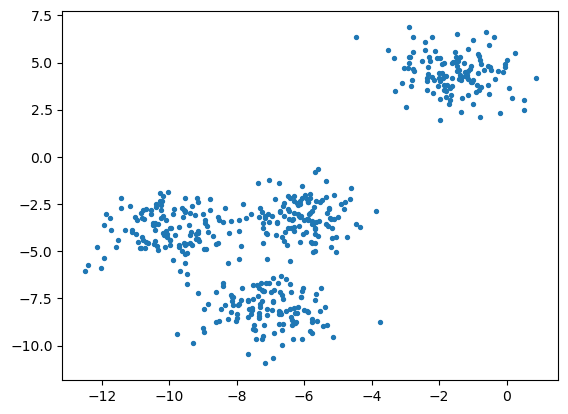

In [3]:
# 如果数据是可以画图的，聚类之前请务必画图

fig, ax1 = plt.subplots(1)
ax1.scatter(x[:, 0], x[:, 1]
            , marker = 'o'
            , s = 8)
plt.show()

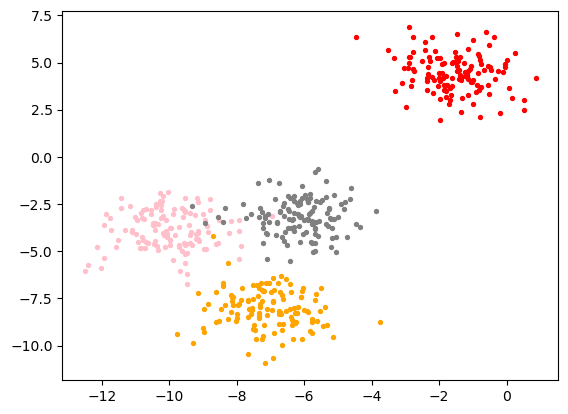

In [4]:
color = ['red', 'pink', 'orange', 'gray']
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(x[y == i, 0], x[y == i, 1]
                , marker = 'o'
                , s = 8
                , c = color[i])
    
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
cluster = KMeans(n_clusters=3, random_state=0).fit(x)

In [7]:
# _labels，查看句号的类别，每个样本所对应的类

y_pred = cluster.labels_
y_pred

array([2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1,

In [8]:
# kmeans因为不需要建立模型或者预测结果，因此我们只需要fit就能够得到聚类结果了
# predict和fit_predict，表示学习数据X并对X的类进行预测
# 但所得到的结果我们不调用predict，直接fit之后用label一样

pre  = cluster.fit_predict(x)
pre

array([2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1,

In [9]:
# 什么时候用predict？数据量太大的时候
# 其实我们并不需要所有的数据来寻找质心，少量的数据就可以帮助我们确认质心了
# 当是数据量很大的时候，我们使用部分数据来帮助我们确认质心
# 剩下数据的聚类结果，使用predict来调用

cluster_smallsub = KMeans(n_clusters=3, random_state=0).fit(x[:200])
smallsub_y_pred = cluster_smallsub.predict(x)
y_pred == smallsub_y_pred

# 但是这样的结果，肯定与直接fit不是一模一样。


array([ True,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,

In [10]:

# 查看质心

centers = cluster.cluster_centers_
centers

array([[-1.54234022,  4.43517599],
       [-8.08734194, -3.49920867],
       [-7.10664372, -8.07416549]])

In [11]:
# 查看距离平方和

inertia = cluster.inertia_
inertia

# 但是我们不能判断这个inertia是大是小

1903.69794565734

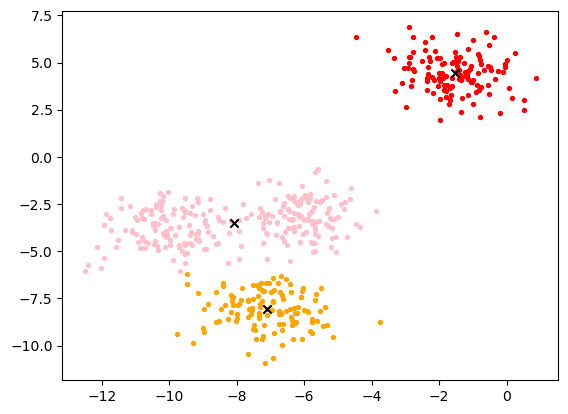

In [12]:
color = ['red', 'pink', 'orange']
fig, ax1 = plt.subplots(1)

for i in range(3):
    ax1.scatter(x[y_pred == i, 0], x[y_pred == i, 1]
                , marker = 'o'
                , s = 8
                , c = color[i])

ax1.scatter(centers[:, 0], centers[:, 1]
            ,marker='x'
            ,c = 'black'   )   
plt.show()

In [13]:
# 不知道这个是否是最好的聚类效果
cluster4 = KMeans(n_clusters=4, random_state=0).fit(x)
inertia4 = cluster4.inertia_
inertia4

908.3855684760617

In [14]:
cluster5 = KMeans(n_clusters=5, random_state=0).fit(x)
inertia5 = cluster5.inertia_
inertia5

835.6245005367679

In [15]:
cluster6 = KMeans(n_clusters=6, random_state=0).fit(x)
inertia6 = cluster6.inertia_
inertia6

752.7163094271175

In [16]:
cluster500 = KMeans(n_clusters=500, random_state=0).fit(x)
inertia500 = cluster500.inertia_
inertia500

0.0

### 模型评估指标

##### 外部指标(External Indices)

$\cdot$ 这些指标在你有真实标签时使用。

$\cdot$ 提供了一个与真实情况对比的“客观”评估，告诉你算法有多“正确”。

###### 调整兰德指数(Adjusted Rand Index, ARI) 

$$ \text{ARI} = \frac{\text{Rand Index} - E[\text{Rand Index}]}{\max(\text{Rand Index}) - E[\text{Rand Index}]} $$
其中，$E[\text{Rand Index}]$ 表示随机分配下的期望兰德指数。

$\bullet$ ARI衡量了聚类结果和真实标签之间划分的相似性，介于**-1到1**之间：

$\cdot$ 接近1：聚类结果与真实标签高度一致，算法的划分与实际数据的内在结构非常吻合。

$\cdot$ 接近0：聚类结果与随机划分无异。

$\cdot$ 负值：结果比随机划分还差。

$\cdot$ 它会调整随机机会造成的匹配，因此即使聚类是随机的，ARI 也倾向于接近 0，使得不同数据集和不同聚类数量下的比较更加公平。


###### 同质性 (Homogeneity) 和完整性 (Completeness)

同质性 $H$：反应了每个簇中数据点的纯度。如果一个簇中只包含来自一个真实类别的样本，那么同质性就高。
$$ H = 1 - \frac{H(C|K)}{H(C)} $$
完整性 $C$：反映每个真是类别的数据点是否都被分到了同一个簇中
$$ C = 1 - \frac{H(K|C)}{H(K)} $$

其中，$H(C)$ 是真实类别熵，$H(C|K)$ 是给定聚类结果的真实类别条件熵；$H(K)$ 是聚类结果熵，$H(K|C)$ 是给定真实类别的聚类结果条件熵。

###### 基于同质性和完整性的**V-measure**定义为：
$$ V = 2 \frac{H \cdot C}{H + C} $$

这三个指标的取值范围都在**0到1**之间。

$\cdot$ 接近1：聚类效果好。同质性高说明簇内纯度高，完整性高说明同类样本被完整收集。

$\cdot$ 接近0：表示聚类效果差。

##### 内部指标(Internal Indices)

内部指标（轮廓系数, CH Index, DB Index等）在没有真实标签时，从**聚类结果本身的结构特性**（如紧凑性、分离度）来评估聚类质量，告诉你算法是否产生了“有意义”的簇结构。

###### 轮廓系数(Silhouette Coefficient)

对于数据集中的每个样本 $i$，轮廓系数 $s(i)$ 定义为：
$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$
其中，$a(i)$ 是样本 $i$ 到同一簇中所有其他样本的平均距离，$b(i)$ 是样本 $i$ 到最近的相邻簇中所有样本的平均距离。
整个聚类结果的轮廓系数是所有样本轮廓系数的平均值。

$\cdot$ 衡量了每个样本点与它所在的簇的相似度和与相邻簇的不相似度。它试图平衡簇的紧凑性和分离性。取值范围**-1到1**，值越高越好

$\cdot$ 接近1：表示样本点很好的聚类，它与自己簇内的点很近，与相邻簇的点很远。这通常意味着簇是紧凑且分离良好的。

$\cdot$ 接近0：表示样本点位于两个簇的边界附近，可能被错误地分配，或者簇之间有重叠。

$\cdot$ 接近-1： 表示样本点可能被分到了错误的簇中，它与相邻的簇的距离比与自己簇的距离更近。

$\cdot$ 直观，能反应单个样本的聚类情况，但计算成本相对较高。


###### Calinski-Harabasz 指数 (CH Index)

$$ \text{CH Index} = \frac{\text{SS}_B}{\text{SS}_W} \cdot \frac{N-k}{k-1} $$
其中，$\text{SS}_B$ 是簇间离散度，$\text{SS}_W$ 是簇内离散度，$N$ 是数据点的总数，$k$ 是簇的数量。

$\cdot$ 通过计算簇间离散度和簇内离散度来衡量聚类效果。

$\cdot$ 没有上限，通常是正值，值越大越好。高CH值以为着簇与簇之间分离得很开（高簇间离散度），并且每个簇内的点都非常紧密（低簇内离散度）。这是理想的聚类效果。

$\cdot$ **计算速度快，适用于凸型簇。**

$\cdot$ 它在寻找最佳聚类数量$K$时常用，通常选择使CH最大的$K$.

###### Davies-Bouldin 指数 (DB Index)

$$ \text{DB Index} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$
其中，$k$ 是簇的数量，$\sigma_i$ 是簇 $i$ 内部样本与其质心的平均距离，$d(c_i, c_j)$ 是簇 $i$ 和簇 $j$ 的质心之间的距离。

$\cdot$ 衡量了簇内离散度和簇间距离的比率，然后对所有簇对最大值求平均。它试图找到最差一对簇的比率。

$\cdot$ 大于等于0，没有上限。值越低越好。低DB值意味着簇内部样本点很紧密，并且簇与簇之间的距离很大。

$\cdot$ 与CH指数类似，常用于选择最佳聚类数量$K$，选择使DB值最小的K。

$\cdot$ 对球形簇表现好。


In [ ]:
# 轮廓系数
from sklearn.metrics import silhouette_score, silhouette_samples

In [20]:
x

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [21]:
y_pred

array([2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1,

In [18]:
silhouette_score(x, y_pred)

0.5877515633992911

In [ ]:
silhouette_score(x, cluster4.labels_)
# 说明4簇效果好于3

0.6505186632729437

In [ ]:
silhouette_score(x, cluster5.labels_)
# 说明4簇效果好于5

0.5562702511808184

In [ ]:
silhouette_score(x, cluster6.labels_)
# 说明4簇效果好于6

0.44131023005295217

In [ ]:
silhouette_samples(x, y_pred)
# 返回每个样本的轮廓系数

array([ 0.62779217,  0.50646734,  0.56054545,  0.84865662,  0.56040386,
        0.78715871,  0.39393542,  0.44387831,  0.48471987,  0.41711381,
        0.62206594,  0.75305022,  0.5018387 ,  0.8450431 ,  0.5474551 ,
        0.60184474,  0.54527639,  0.6871011 ,  0.86590487,  0.25566166,
        0.4909824 ,  0.47803072,  0.22389188,  0.80943332,  0.54159089,
        0.30643946,  0.88544986,  0.84032938,  0.5272904 ,  0.49340113,
        0.65091687,  0.85586661,  0.4784599 ,  0.60161745,  0.44338325,
        0.68070304,  0.44456033,  0.42101325,  0.63191294,  0.40217138,
        0.54617315,  0.56185582,  0.78340282,  0.37221073,  0.35218463,
        0.74185013,  0.53591328,  0.368201  ,  0.87704349,  0.79575865,
        0.8462622 ,  0.37950542,  0.41700467,  0.4038188 ,  0.64526248,
        0.45949863,  0.31341598,  0.09545383,  0.37485595,  0.56458734,
        0.86137474,  0.82613732,  0.53139532,  0.35705271,  0.86981347,
        0.52329749,  0.71189035,  0.52790031,  0.42088989,  0.31

In [25]:
# CHI
from sklearn.metrics import calinski_harabasz_score

In [26]:
calinski_harabasz_score(x, y_pred)

1809.814211346333

In [ ]:
calinski_harabasz_score(x, cluster4.labels_)
# 4簇的chi最大

2704.4858735121093

In [29]:
calinski_harabasz_score(x, cluster5.labels_)

2211.311829608196

In [30]:
calinski_harabasz_score(x, cluster6.labels_)

1970.8168923820306

In [32]:
from time import time

t0 = time()
calinski_harabasz_score(x, y_pred)
time() - t0

0.0019941329956054688

In [ ]:
t0 = time()
silhouette_score(x, y_pred)
time() - t0

# 可以看出来CHI计算速度快

0.012864828109741211

In [34]:
import datetime
datetime.datetime.fromtimestamp(t0).strftime('%Y-%m-%d %H:%M:%S')

'2025-07-18 15:48:30'

### 基于轮廓系数选择$K$

In [36]:
import matplotlib.cm as cm # colormap
import numpy as np
import pandas as pd

For n_clusterd  =  4 The average silhouette_score is: 0.6505186632729437


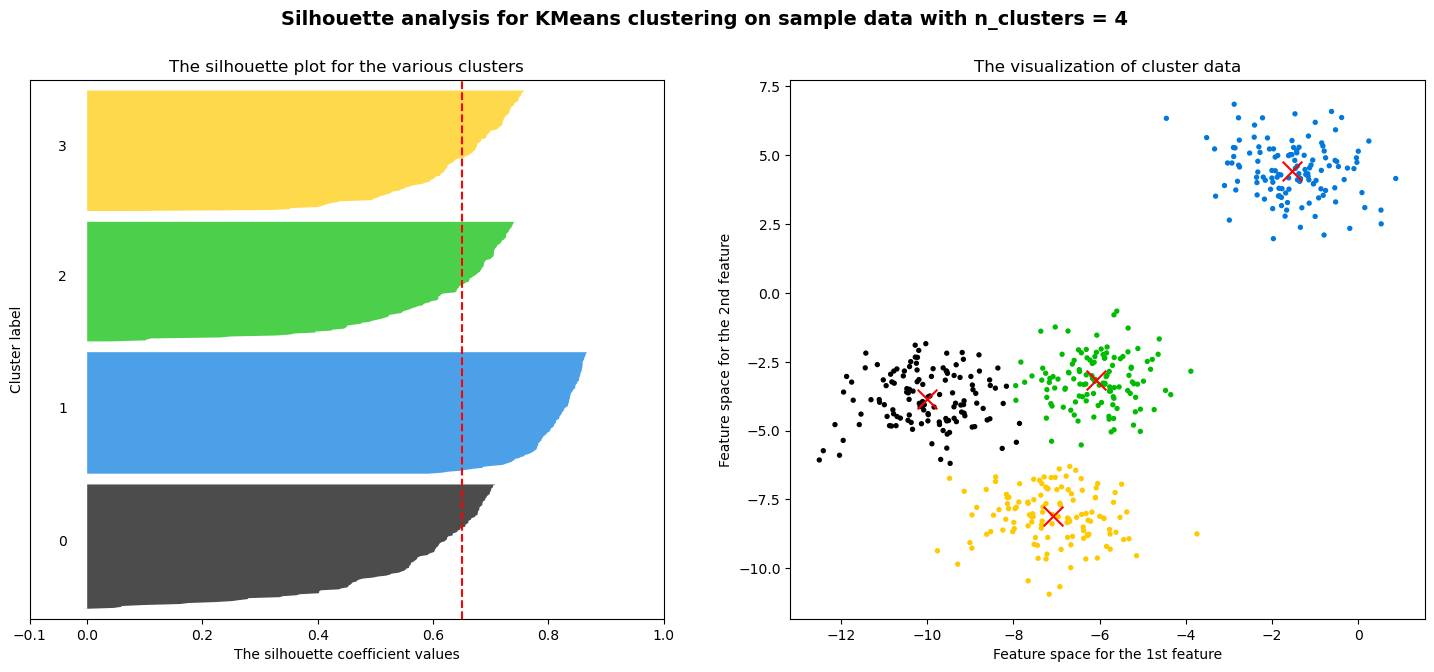

In [47]:
n_clusters = 4

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(18, 7)

# 第一个图画出每个聚出来的类的轮廓系数是多少
# 结果好的类我们可以直接拿出来用了
# 第二个图是各个类之间的轮廓系数的对比
# 知道聚类完毕后图像的分布

# 第一个图是由各个簇的轮廓系数组成的横向条形图
# 横向条形图的横坐标是轮廓系数，纵坐标是每个样本
# 轮廓系数在[-1,1]之间

ax1.set_xlim([-0.1, 1])

# 一般来说，纵坐标是从0开始，最大值到x.shape[0]的取值
# 但是我们希望每个簇能排在一起，不同的簇之间有一定的空隙

ax1.set_ylim([0, x.shape[0] + (n_clusters + 1) * 10])

cluster4 = KMeans(n_clusters=n_clusters, random_state=10).fit(x)
cluster_labels = cluster4.labels_

silhouette_avg = silhouette_score(x, cluster_labels)

print('For n_clusterd  = ', n_clusters, 'The average silhouette_score is:', silhouette_avg)


# 返回每个样本点的轮廓系数，作为向量的第一个量
sample_silhouette_values = silhouette_samples(x, cluster_labels)

# 设定y轴的初始取值
y_lower = 10

for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓次数，并对其进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    # sort回直接改掉原数据的顺序，所以不能在上一行代码.sort
    ith_cluster_silhouette_values.sort()

    # 查看i簇中样本数
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # 簇i在y轴上的取值，应该由初始值(y_lower)开始，到初始值加上这个簇中样本数量结束(y_upper)
    y_upper = y_lower + size_cluster_i

    # colormap库中，使用小数来调用颜色
    color = cm.nipy_spectral(float(i)/n_clusters)

    # 开始画子图1
    # fill_between是让一个范围中的柱状图都统一颜色
    # fill_betweenx的范围是在纵坐标上，参数为（定义曲线的点的横坐标，定义曲线的点的纵坐标，柱状图的颜色）
    # fill_betweeny的范围是在横坐标上
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      , ith_cluster_silhouette_values
                      , facecolor = color
                      , alpha  = 0.7)
    
    # 为每个簇的轮廓系数写上簇的变好，并且让簇的变好显示坐标轴上每个条形图中间位置
    ax1.text(-0.05
             , y_lower + 0.5 * size_cluster_i
             , str(i)
             )
    # 为下一个簇的计算新的y轴的初始值，在每一次循环之后，上限加10，保证不同簇的图像之间有空隙
    y_lower = y_upper + 10

ax1.set_title('The silhouette plot for the various clusters')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

# 把整个数据集上的轮廓系数的均值以虚线形式放入图中
ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

ax1.set_yticks([])

ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


# 开始画第二个图
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(x[:, 0], x[:, 1]
            , marker = 'o'
            , s = 8
            , c = colors)

# 将质心加到图像中
centers = cluster4.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1]
            , marker = 'x'
            , c = 'red'
            , alpha = 1
            , s = 200)
ax2.set_title('The visualization of cluster data')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(('Silhouette analysis for KMeans clustering on sample data' ' with n_clusters = %d' % n_clusters)
             , fontsize = 14
             , fontweight = 'bold')
plt.show()

For n_clusterd  =  2 The average silhouette_score is: 0.7049787496083262


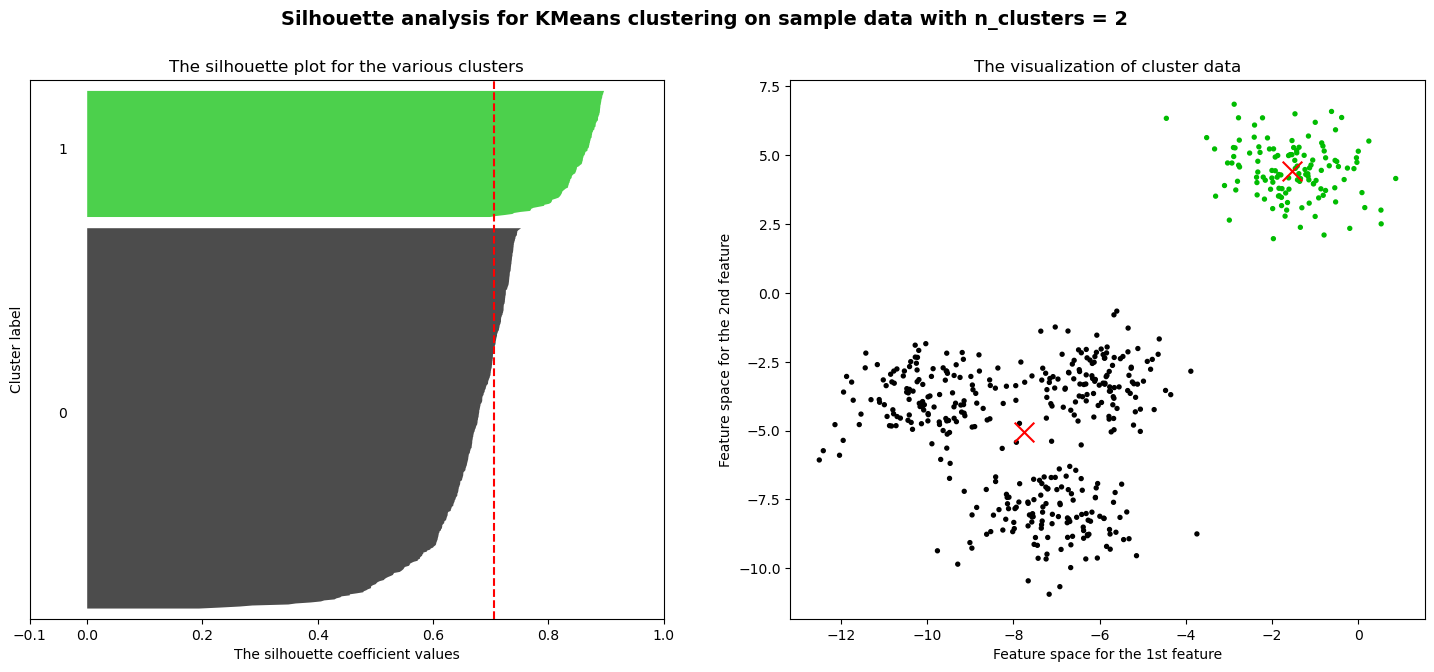

For n_clusterd  =  3 The average silhouette_score is: 0.5882004012129721


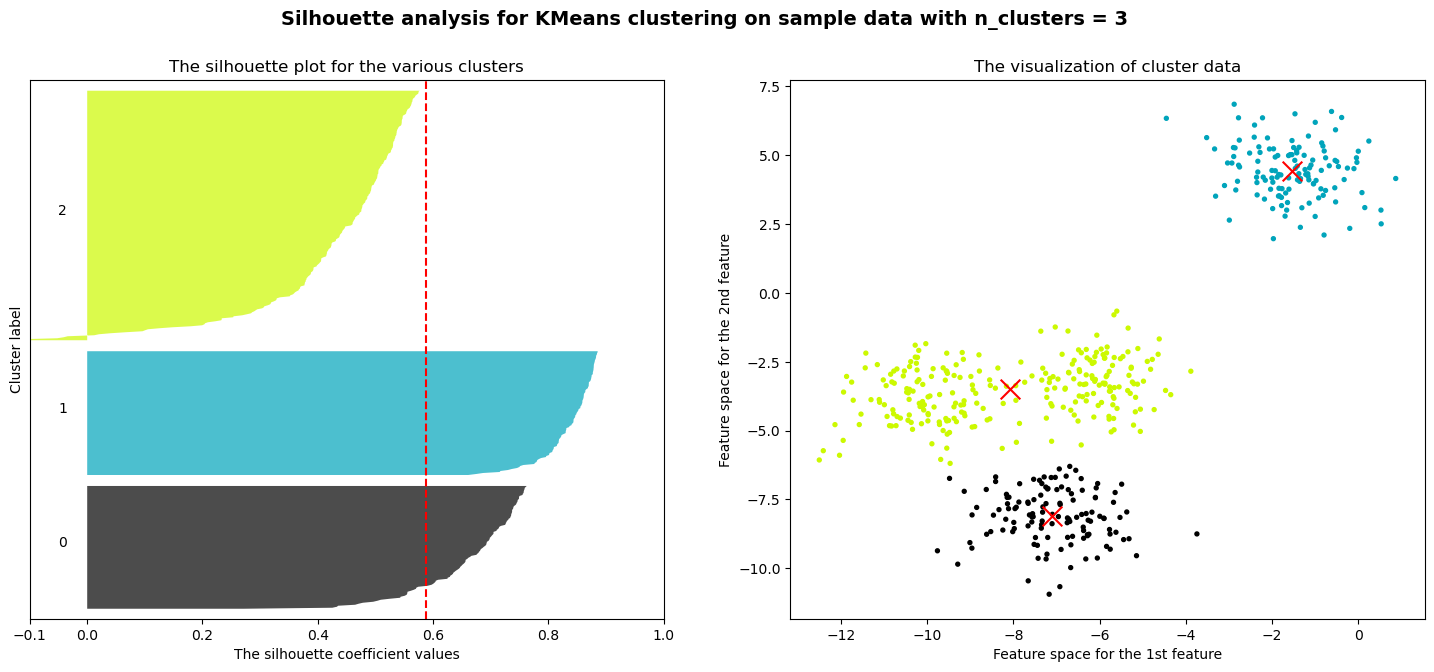

For n_clusterd  =  4 The average silhouette_score is: 0.6505186632729437


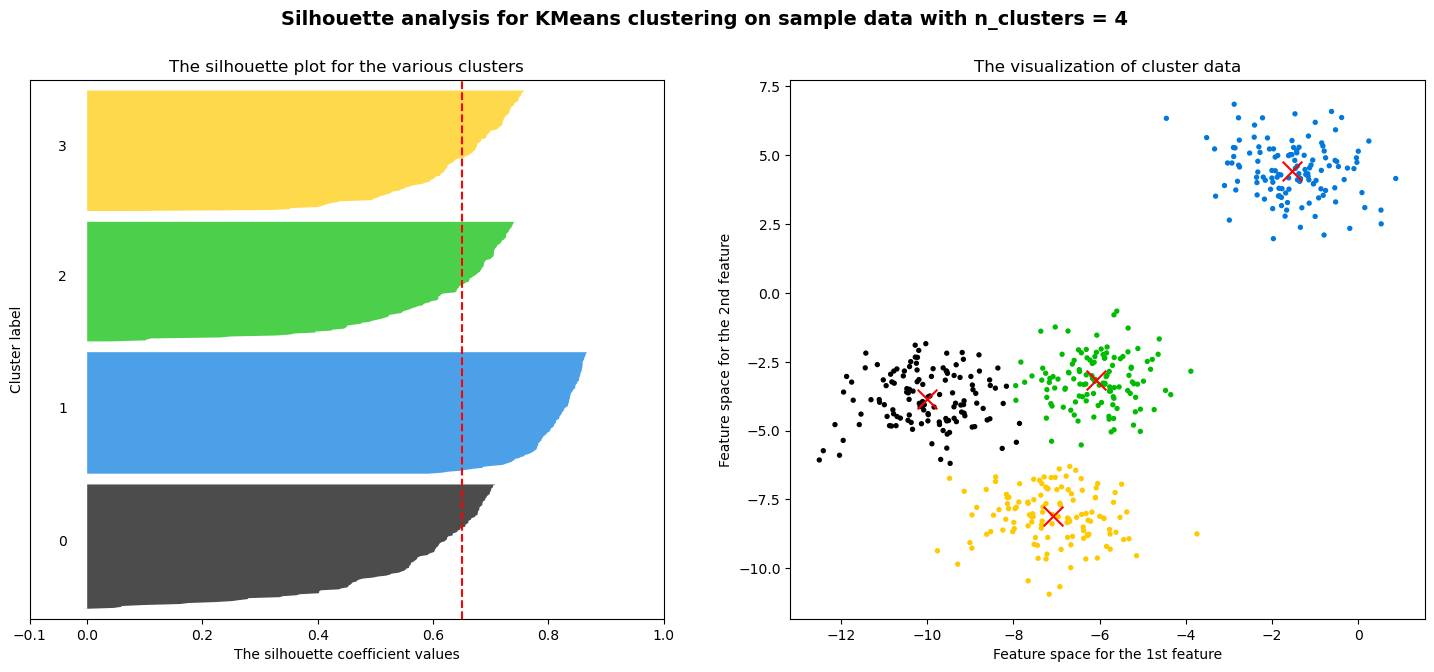

For n_clusterd  =  5 The average silhouette_score is: 0.561464362648773


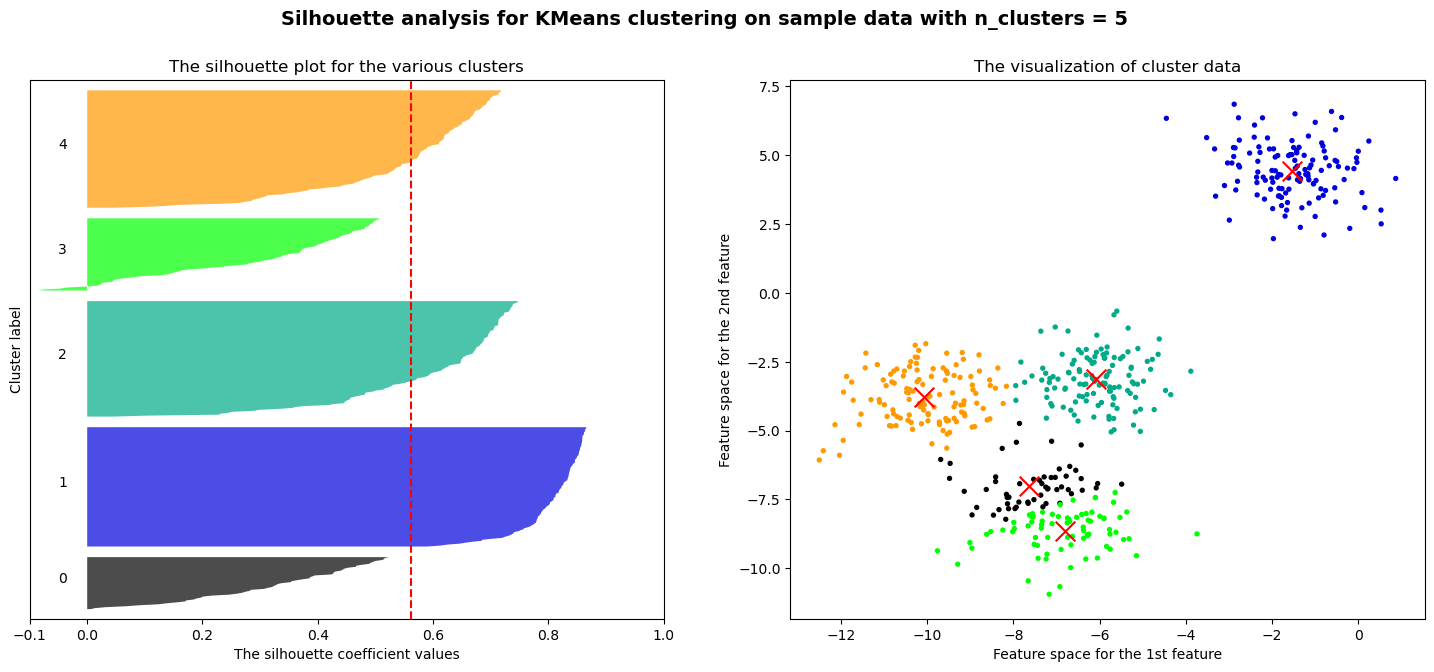

For n_clusterd  =  6 The average silhouette_score is: 0.4857596147013469


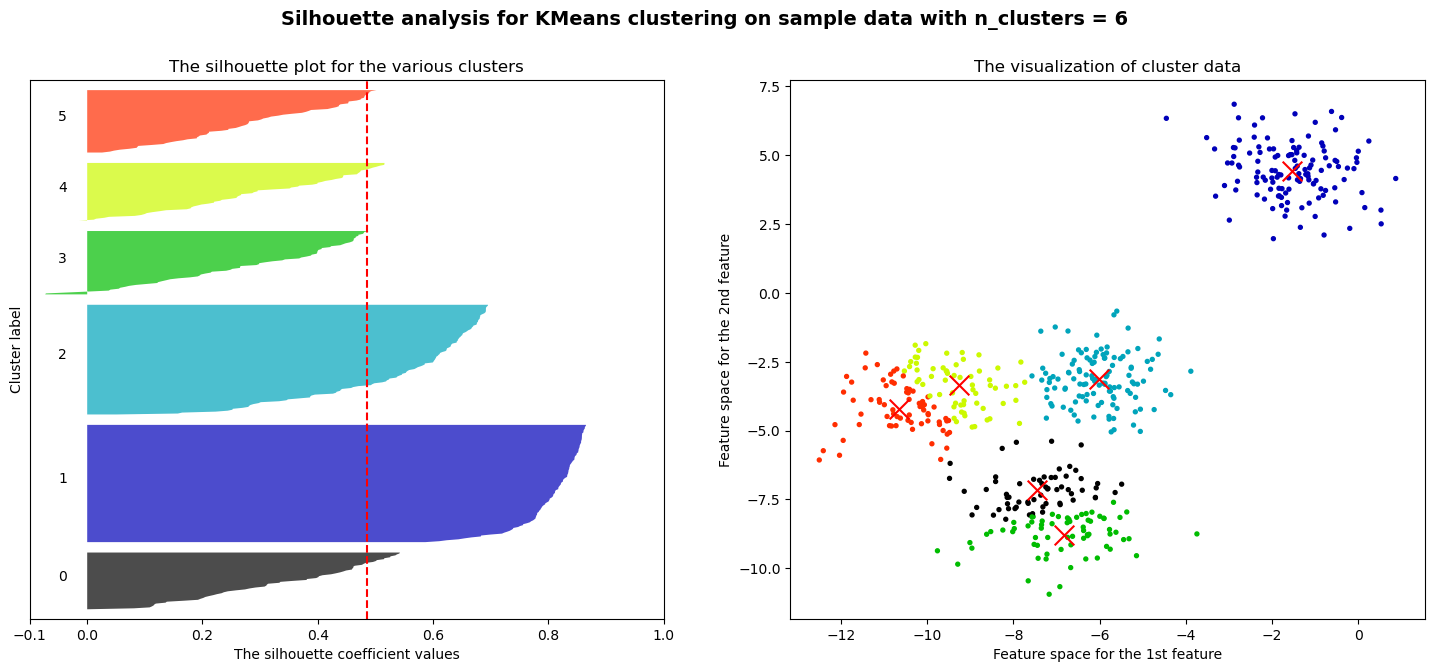

For n_clusterd  =  7 The average silhouette_score is: 0.49731550839901734


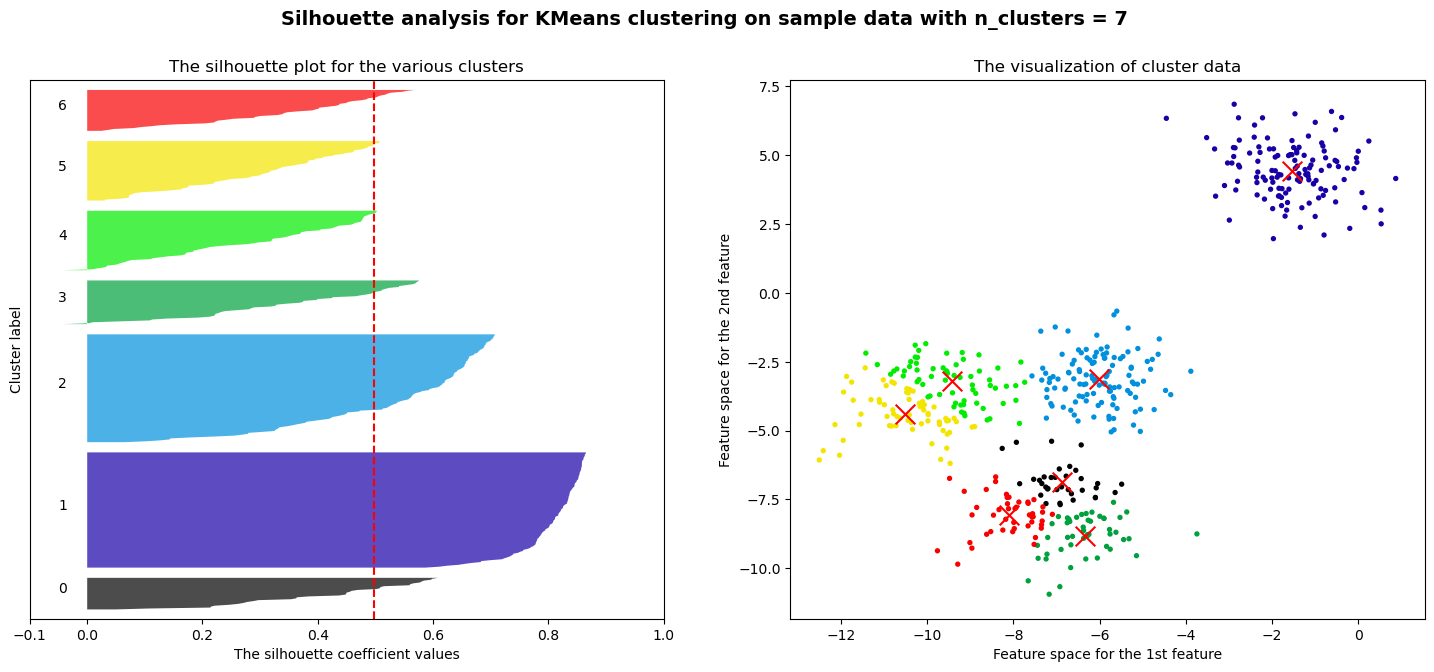

In [49]:
# 将上面的代码包装成一个函数
for n_clusters in [2, 3, 4, 5, 6, 7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_size_inches(18, 7)

    # 第一个图画出每个聚出来的类的轮廓系数是多少
    # 结果好的类我们可以直接拿出来用了
    # 第二个图是各个类之间的轮廓系数的对比
    # 知道聚类完毕后图像的分布

    # 第一个图是由各个簇的轮廓系数组成的横向条形图
    # 横向条形图的横坐标是轮廓系数，纵坐标是每个样本
    # 轮廓系数在[-1,1]之间

    ax1.set_xlim([-0.1, 1])

    # 一般来说，纵坐标是从0开始，最大值到x.shape[0]的取值
    # 但是我们希望每个簇能排在一起，不同的簇之间有一定的空隙

    ax1.set_ylim([0, x.shape[0] + (n_clusters + 1) * 10])

    cluster4 = KMeans(n_clusters=n_clusters, random_state=10).fit(x)
    cluster_labels = cluster4.labels_

    silhouette_avg = silhouette_score(x, cluster_labels)

    print('For n_clusterd  = ', n_clusters, 'The average silhouette_score is:', silhouette_avg)


    # 返回每个样本点的轮廓系数，作为向量的第一个量
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    # 设定y轴的初始取值
    y_lower = 10

    for i in range(n_clusters):
        # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓次数，并对其进行排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # sort回直接改掉原数据的顺序，所以不能在上一行代码.sort
        ith_cluster_silhouette_values.sort()

        # 查看i簇中样本数
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # 簇i在y轴上的取值，应该由初始值(y_lower)开始，到初始值加上这个簇中样本数量结束(y_upper)
        y_upper = y_lower + size_cluster_i

        # colormap库中，使用小数来调用颜色
        color = cm.nipy_spectral(float(i)/n_clusters)

        # 开始画子图1
        # fill_between是让一个范围中的柱状图都统一颜色
        # fill_betweenx的范围是在纵坐标上，参数为（定义曲线的点的横坐标，定义曲线的点的纵坐标，柱状图的颜色）
        # fill_betweeny的范围是在横坐标上
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                        , ith_cluster_silhouette_values
                        , facecolor = color
                        , alpha  = 0.7)
        
        # 为每个簇的轮廓系数写上簇的变好，并且让簇的变好显示坐标轴上每个条形图中间位置
        ax1.text(-0.05
                , y_lower + 0.5 * size_cluster_i
                , str(i)
                )
        # 为下一个簇的计算新的y轴的初始值，在每一次循环之后，上限加10，保证不同簇的图像之间有空隙
        y_lower = y_upper + 10

    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # 把整个数据集上的轮廓系数的均值以虚线形式放入图中
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax1.set_yticks([])

    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 开始画第二个图
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(x[:, 0], x[:, 1]
                , marker = 'o'
                , s = 8
                , c = colors)

    # 将质心加到图像中
    centers = cluster4.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1]
                , marker = 'x'
                , c = 'red'
                , alpha = 1
                , s = 200)
    ax2.set_title('The visualization of cluster data')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(('Silhouette analysis for KMeans clustering on sample data' ' with n_clusters = %d' % n_clusters)
                , fontsize = 14
                , fontweight = 'bold')
    plt.show()

In [ ]:
# 从上面得到 k=2的时候，轮廓系数最高，但是黑色那一簇没有很多相似性
# 根据实际业务应用进行选择K


### 其他重要参数
#### init & random_state & n_init：初始质心选择

一般我们使用init = 'k-means++' 作为质心初始化方案

| 参数 | 说明 |
|---|---|
| init | 可输入kmeans++ random或者一个n维数组 <br/> 默认kmeans++ <br/> 如果输入n维数组，数组形状要求是(n_clusters, n_features)并给出初始质心 |
| random_state| |
| n_init | 整数，默认10 <br/> 使用不同的质心随机初始化的种子来运行kmeans算法的次数 <br/> 最终结果是基于inertia来计算的n_init次连续运行后的最佳输出|


In [61]:
t0 = time()
plus = KMeans(n_clusters=10).fit(x)
plus.n_iter_


9

In [62]:
time() - t0

1.7204036712646484

In [63]:
t0 = time()
random = KMeans(n_clusters=10, init='random', random_state=420).fit(x)
random.n_iter_

13

In [ ]:
time() - t0

1.734853744506836

#### max_iter & tol 

让迭代停下来，数据量特别大的时候可以用

| 参数 | 说明 |
|---|---|
| max_iter | 整数，默认300 <br/> 单次运行的k-means算法的最大迭代次数 |
| tol | 浮点数，默认1e-4 <br/> 两次迭代间inertia下降的量，如果两次迭代之间Inertia下降的值小于tol所设定的值，迭代就会停下 |

In [69]:
random  = KMeans(n_clusters=4, init = 'random', max_iter=1, random_state=420).fit(x)
y_pre_max10 = random.labels_
silhouette_score(x, y_pre_max10)

0.6435856693961358

In [70]:
random = KMeans(n_clusters=4, init = 'random', max_iter=2, random_state=420).fit(x)
y_pre_max20 = random.labels_
silhouette_score(x, y_pre_max20)

0.6505186632729437

#### 接口
| 接口 | 输入 | 功能&返回 |
|---|---|---|
| fit | 训练特征矩阵X, [训练用标签, sample_weight] | 拟合模型，计算K均值的聚类结果 |
| fit_predict | 训练特征矩阵X, [训练用标签, sample_weight] | 返回每个样本所对应的簇的索引 <br/> 计算质心并且为每个样本预测所在簇的簇的索引，功能相当于先fit再predict |
| fit_transform | 训练特征矩阵X, [训练用标签, sample_weight] | 返回新空间中的特征矩阵 <br/> 进行聚类并且将特征矩阵X转换到簇距离空间当中，功能相当于先fit再transform |
| get_params | 不需要任何输入 | 获取该类的参数 |
| predict | 测试特征矩阵X, [sample_weight] | 预测每个测试集中X的样本的所在簇，并返回每个样本所对应的簇的索引 <br/> 在矢量量化的相关文献中，cluster_centers_被称为代码簿，而predict返回的每个值是代码簿中最接近的代表的索引。 |
| score | 测试特征矩阵X, [训练用标签, sample_weight] | 返回聚类后的Inertia，即簇内平方和的负数 <br/> 簇内平方和是Kmeans常用的模型评价指标，簇内平方和越小越好，最佳值为0 |
| set_params | 需要新设定的参数 | 为建立好的类重设参数 |
| transform | 任意特征矩阵X | 将X转换到簇距离空间中 <br/> 在新空间中，每个维度（即每个坐标轴）是样本点到某集群中心的距离。请注意，即使X是稀疏的，变换返回的数组通常也是密集的。 |

#### 函数cluster.k_means



一次性依次返回质心、每个样本对应的簇的标签，inertial以及最佳迭代次数。

In [ ]:
# kmeans = KMeans(
#     n_clusters=8,  # 要形成的簇的数量
#     init='k-means++',  # 质心初始化方法
#     n_init=10,  # 运行K-Means算法的次数
#     max_iter=300,  # 单次运行的最大迭代次数
#     tol=1e-4,  # 收敛的阈值
#     random_state=None,  # 随机数生成器种子
#     algorithm='auto',  # K-Means算法实现方式
#     verbose=0,  # 控制冗余程度
#     copy_x=True,  # 是否复制输入数据
#     n_jobs=None  # 并行作业数量
# )

In [71]:
from sklearn.cluster import k_means

k_means(x, 4, return_n_iter=True)

(array([[-10.00969056,  -3.84944007],
        [ -1.54234022,   4.43517599],
        [ -6.08459039,  -3.17305983],
        [ -7.09306648,  -8.10994454]]),
 array([3, 3, 0, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 3, 1, 2, 0, 0,
        2, 1, 2, 2, 1, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 0, 3, 0, 2, 0, 1, 2,
        2, 3, 0, 2, 1, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2,
        3, 2, 0, 0, 3, 0, 2, 3, 2, 2, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 3, 0, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 0,
        2, 3, 1, 0, 1, 0, 1, 2, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 3, 2, 1, 0,
        0, 0, 0, 3, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 0, 0, 1, 3,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 2, 1, 3, 0, 2, 3, 1, 0,
        0, 0, 0, 3, 2, 0, 1, 3, 3, 0, 2, 3, 3, 2, 1, 1, 3, 3, 2, 1, 2, 3,
        3, 1, 3, 0, 1, 2, 2, 3, 2, 0, 3, 2, 0, 2, 0, 3, 2, 2, 2, 1, 0, 1,
        2, 3, 0, 2, 0, 0, 0, 1, 0, 1, 3, 0, 3, 0, 1, 1, 0, 3, 1, 3, 2, 0,
        3, 3, 3, 3, 2, 0, 3, 0, 